# Wrangle and Analyze WeRateDogs Data

## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time

### The WeRateDogs Twitter archive

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### The tweet image predictions

In [4]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',
                  stream=True)

In [5]:
# From https://stackoverflow.com/questions/14114729/save-a-large-file-using-the-python-requests-library
with open('image_predictions.tsv', 'wb') as handle:
    for block in r.iter_content(1024):
        handle.write(block)

In [6]:
image = pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###  Twitter API 

In [8]:
# Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON 
#data in a file. Running time was around 40 minutes

# i = 1

# with open('tweet_json.txt', 'w') as outfile:
#     start = time.time()
#     for tweet in archive.tweet_id[:5]:
#         try:
#             tweet = api.get_status(tweet, tweet_mode='extended')
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#             print(i, '-', tweet.id_str)
#             end = time.time()
#             print('Elapsed time: {} seconds.'.format(round((end - start), 2)))
#             i += 1
#         except:
#             print("Tweet ID {} not found.".format(tweet))
#             print('Elapsed time: {} seconds.'.format(round((end - start), 2)))

In [9]:
twitter_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet_json.txt', 'r'):
    d = json.loads(line)
    twitter_list.append({'tweet_id': d['id_str'],
                     'retweet_count': d['retweet_count'],
                     'favorite_count': d['favorite_count']})

In [10]:
# Convert the list of dictionaries to a pandas DataFrame
twitter = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [11]:
twitter.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8590,38824
1,892177421306343426,6313,33255
2,891815181378084864,4190,25047
3,891689557279858688,8707,42191
4,891327558926688256,9474,40350


## Assess

In [12]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
twitter

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8590,38824
1,892177421306343426,6313,33255
2,891815181378084864,4190,25047
3,891689557279858688,8707,42191
4,891327558926688256,9474,40350
5,891087950875897856,3136,20238
6,890971913173991426,2088,11863
7,890729181411237888,19045,65579
8,890609185150312448,4300,27788
9,890240255349198849,7474,31958


In [15]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null object
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [18]:
archive.timestamp.dtype

dtype('O')

In [19]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
archive[archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [21]:
archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [22]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
archive.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Lola             10
Penny            10
Tucker           10
Winston           9
Bo                9
the               8
Sadie             8
Buddy             7
Toby              7
Bailey            7
an                7
Daisy             7
Bella             6
Oscar             6
Milo              6
Scout             6
Stanley           6
Leo               6
Jax               6
Dave              6
Rusty             6
Jack              6
Koda              6
Oakley            5
               ... 
Theo              1
Hamrick           1
Stella            1
Skittle           1
Edd               1
unacceptable      1
Torque            1
O                 1
Bubba             1
Mitch             1
Rambo             1
Hanz              1
Josep             1
Anthony           1
Koko              1
Tayzie            1
Maxwell           1
Yoda              1
Ed                1


In [25]:
# Create a new dataframe where the names of the dogs are 'None', 'a', 'the', and 'an'
archive_noname = archive[(archive.name == 'None') | (archive.name == 'a') | (archive.name == 'the') | (archive.name == 'an')]

# Check the tweet texts of the new dataframe
for text in archive_noname.text:
    print(text)

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
Here we have a corgi undercover as a malamute. Pawbably doing impor

In [26]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
beagle                        18
Shetland_sheepdog             18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [28]:
image.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
chow                               20
miniature_pinscher                 20
malinois                           20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [29]:
image.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [30]:
twitter.describe()

,retweet_count,favorite_count
count,2345.000000,2345.000000
mean,3026.315139,8070.855437
std,5033.916353,12144.220924
min,0.000000,0.000000
25%,607.000000,1404.000000
50%,1413.000000,3539.000000
75%,3524.000000,9979.000000
max,77383.000000,143471.000000


In [31]:
# Check if all tweets from the image table are in the archive table
pd.Series(list(set(archive.tweet_id) & set(image.tweet_id)))

0       666051853826850816
1       666049248165822465
2       666094000022159362
3       666373753744588802
4       666055525042405380
5       667090893657276420
6       667878741721415682
7       670046952931721218
8       671115716440031232
9       672594978741354496
10      700002074055016451
11      740365076218183684
12      745712589599014916
13      687818504314159109
14      695767669421768709
15      669567591774625800
16      676821958043033607
17      887473957103951883
18      668643542311546881
19      796080075804475393
20      741303864243200000
21      671789708968640512
22      673708611235921920
23      674042553264685056
24      798673117451325440
25      711306686208872448
26      716802964044845056
27      736225175608430592
28      738537504001953792
29      765222098633691136
               ...        
2045    667435689202614272
2046    818536468981415936
2047    674019345211760640
2048    680206703334408192
2049    685268753634967552
2050    685547936038666240
2

### Quality
#### `archive` table
- Tweet ID column is an int64, not a string
- Timestamp column is a Python object, not a datetime
- Source column is in HTML-formatted string, not a normal string
- Replies and retweets are included (78 and 181, respectively)
- Missing URLs in some rows
- Numerator ratings have suspicious outliers
- Denominator ratings have values not equal to 10
- Missing dog names (745 with None)
- Incorrect dog names (55 with 'a', 8 with 'the', and 7 with 'an')
- Missing dog stages (None in dog stage columns)
- Not all tweets are dog ratings

#### `image` table
- Tweet ID column is an int64, not a string
- Predicted dog breed is separated by underscore
- Missing images (only 2076 counts out of possible 2356)

#### `twitter` table
- Missing tweets (2346 out of possible 2356)

### Tidiness
- One variable in four columns in `archive` table (dog_stage)
- Data is unnecessarily separated in three tables: `archive`, `image`, and `twitter`

## Clean

In [32]:
archive_clean = archive.copy()
image_clean = image.copy()
twitter_clean = twitter.copy()

### Excess Data
#### `archive`: Replies and retweets are included (78 and 181, respectively)
##### Define
Delete the tweets which are either replies or retweets.

##### Code

In [33]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

##### Test

In [34]:
# Should be empty
archive_clean[archive_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
# Should be empty
archive_clean[archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Define
Delete the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`.

##### Code

In [36]:
archive_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], 
                   axis=1, inplace=True)

##### Test

In [37]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [38]:
archive_clean.shape

(2097, 12)

### Missing Data Part A
#### `archive`: Missing URLs in some rows
##### Define
Add the missing URL using the Tweet ID in the `expanded_urls` column.

##### Code

In [39]:
# Function to apply
def insert_url(archive):
    if type(archive['expanded_urls']) is float: #nan is of float type?
        url = 'https://twitter.com/dog_rates/status/' + str(archive.tweet_id)
        return url
    else:
        return archive['expanded_urls']
    
archive_clean['expanded_urls'] = archive_clean.apply(insert_url, axis=1)    

##### Test

In [40]:
# Should be empty
archive_clean[archive_clean.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `archive`: Missing and incorrect dog names (745 with None, 55 with 'a', 8 with 'the', and 7 with 'an')
##### Define
Change the names 'a', 'the', and 'an' to None.

##### Code

In [41]:
no_name_list = ['a', 'the', 'an']

# Function to apply
def change_name(archive):
    if archive['name'] in no_name_list:
        return 'None'
    else:
        return archive['name']
        
archive_clean['name'] = archive_clean.apply(change_name, axis=1)    

##### Test

In [42]:
# Majority should be None and no 'a', 'the', and 'an'
archive_clean.name.value_counts()

None        672
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          8
Toby          7
Daisy         7
Koda          6
Oscar         6
Jax           6
Bo            6
Bailey        6
Bella         6
Stanley       6
Buddy         5
Chester       5
Leo           5
Louis         5
Milo          5
Dave          5
Rusty         5
Scout         5
Bentley       5
Phil          4
Oakley        4
           ... 
Mutt          1
Rufio         1
Liam          1
Rubio         1
Noosh         1
Ed            1
Einstein      1
Bubba         1
Arya          1
Jazz          1
Snicku        1
Clybe         1
Timison       1
Duddles       1
Barney        1
Devón         1
Cedrick       1
Rontu         1
O             1
Logan         1
Mitch         1
Rambo         1
Hanz          1
Josep         1
Anthony       1
Koko          1
Karl          1
Maxwell       1
Yoda          1
Arnold        1
Name: name, Length: 952,

### Tidiness
#### One variable in four columns in `archive` table (dog_stage)
##### Define
First, create a new column called total to check if there are two dog stages. Then, melt the doggo, floofer, pupper, and puppo columns to a single dog_stage column (dog_stage will indicate the stage). Next, delete the newly created total columns. Convert the dog type to categorical data type.

##### Code

In [43]:
# Combine the strings in a new column (a row should contain NoneNoneNoneNone)
archive_clean['total'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [44]:
archive_clean.total.value_counts()

NoneNoneNoneNone        1761
NoneNonepupperNone       221
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: total, dtype: int64

In [45]:
# Function to apply
def check_stages(archive):
    if archive['total'].count('None') == 2:
        return 'Multiple'
    else:
        if archive['total'].count('doggo') == 1:
            return 'Doggo'
        elif archive['total'].count('floofer') == 1:
            return 'Floofer'
        elif archive['total'].count('pupper') == 1:
            return 'Pupper'
        elif archive['total'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

archive_clean['dog_stage'] = archive_clean.apply(check_stages, axis=1)       

In [46]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'total'], axis=1, inplace=True)

In [47]:
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

##### Test

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null category
dtypes: category(1), int64(3), object(5)
memory usage: 149.7+ KB


In [49]:
# Should match the previously deleted total column
archive_clean.dog_stage.value_counts()

None        1761
Pupper       221
Doggo         72
Puppo         23
Multiple      11
Floofer        9
Name: dog_stage, dtype: int64

### Quality
#### `archive`, `image`: Tweet ID column is an int64, not a string
##### Define
Convert the type of Tweet ID column from an int64 to a string.

##### Code

In [50]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)

##### Test

In [51]:
archive_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [52]:
image_clean.tweet_id.head()

0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: object

#### `archive`: Timestamp column is a Python object, not a datetime
##### Define
Convert the type of timestamp column from a string to a datetime.

##### Code

In [53]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

##### Test

In [54]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 149.7+ KB


#### `archive`: Source column is in HTML-formatted string, not a normal string
##### Define
Extract the source from the HTML-formatted string. Convert the source to categorical data type.

##### Code

In [55]:
archive_clean.source = archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

In [56]:
archive_clean.source = archive_clean.source.astype('category')

##### Test

In [57]:
# Confirm that the HTML tags were removed
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [58]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null category
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null category
dtypes: category(2), datetime64[ns](1), int64(2), object(4)
memory usage: 135.5+ KB


#### `archive`: Numerator ratings have suspicious outliers 
##### Define
Check the remaining outliers. For simplicity, outliers will be classified as having numerator ratings above 14. Manually replace the outliers if applicable. Else, replace with a default value of 10.

##### Code

In [59]:
archive_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [60]:
numer_outliers = [26, 44, 165, 24, 60, 50, 144, 80, 84, 88, 121, 204, 420, 1776, 27, 45, 75, 99]

for outlier in numer_outliers:
    print(archive_clean[archive_clean.rating_numerator == outlier].text.values)

[ 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']
[ "Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"]
[ 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE']
[ 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx']
[ "Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"]
[ 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq']
["IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"]
[ "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"]
[ 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd']
[ 'Here we have an entire 

In [61]:
# Create a dictionary of original (key):corrected (value) rating 
numerator_dict = {26:11, 44:11, 165:11, 24:10, 60:12, 50:11, 144:12, 80:10, 84:12, 
                  88:11, 121:11, 204:12, 420:10, 1776:10, 27:11, 45:9, 75:10, 99:11}

for key, value in numerator_dict.items():
    archive_clean.rating_numerator = archive_clean.rating_numerator.replace(key, value)

##### Test

In [62]:
archive_clean.rating_numerator.value_counts()

12    490
10    441
11    421
13    287
9     154
8      98
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

#### `archive`: Denominator ratings have values not equal to 10
##### Define
Change denominator ratings to 10.

##### Code

In [63]:
archive_clean.rating_denominator = 10

##### Test

In [64]:
# Should all be 10
archive_clean.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

#### `image`: Predicted dog breed is separated by underscore
##### Define
Replace the underscore with a space. Change the format of the dog breed.

##### Code

In [65]:
image_clean.p1 = image_clean.p1.str.replace('_', ' ').str.title()
image_clean.p2 = image_clean.p1.str.replace('_', ' ').str.title()
image_clean.p3 = image_clean.p1.str.replace('_', ' ').str.title()

##### Test

In [66]:
image_clean.p1.value_counts(), image_clean.p2.value_counts(), image_clean.p3.value_counts()

(Golden Retriever             150
 Labrador Retriever           100
 Pembroke                      89
 Chihuahua                     83
 Pug                           57
 Chow                          44
 Samoyed                       43
 Toy Poodle                    39
 Pomeranian                    38
 Malamute                      30
 Cocker Spaniel                30
 French Bulldog                26
 Miniature Pinscher            23
 Chesapeake Bay Retriever      23
 Seat Belt                     22
 Siberian Husky                20
 Staffordshire Bullterrier     20
 German Shepherd               20
 Web Site                      19
 Cardigan                      19
 Maltese Dog                   18
 Eskimo Dog                    18
 Teddy                         18
 Shetland Sheepdog             18
 Beagle                        18
 Shih-Tzu                      17
 Rottweiler                    17
 Lakeland Terrier              17
 Kuvasz                        16
 Italian Greyh

### Tidiness Part B
#### Data is unnecessarily separated in three tables: `archive`, `image`, and `twitter`
##### Define
Merge the three tables `archive`, `image`, and `twitter` tables, joining on Tweet ID. Rename the new table to `twitter_archive_master`.

##### Code

In [67]:
twitter_archive_master = pd.merge(archive_clean, image_clean,
                            on=['tweet_id'], how='left')

In [68]:
twitter_archive_master = pd.merge(twitter_archive_master, twitter_clean,
                            on=['tweet_id'], how='left')

##### Test

In [69]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Orange,0.085851,False,Orange,0.076110,False,8590,38824
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True,6313,33255
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True,4190,25047
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Paper Towel,0.168086,True,Paper Towel,0.040836,False,8707,42191
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,Basset,0.225770,True,Basset,0.175219,True,9474,40350


In [70]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null category
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
retweet_count      

### Missing Data Part B
#### `twitter_archive_master`: Missing images in some rows.
##### Define
Drop the tweets without images.

##### Code

In [71]:
twitter_archive_master.dropna(inplace=True)

##### Test

In [72]:
# Should only be 1971 rows
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null category
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
retweet_count      

## Store

In [73]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyze

In [74]:
df = pd.read_csv('twitter_archive_master.csv', encoding='latin-1')
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,0.097049,False,Orange,0.085851,False,Orange,0.076110,False,8590,38824
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,0.323581,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True,6313,33255
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,0.716012,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True,4190,25047
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,0.170278,False,Paper Towel,0.168086,True,Paper Towel,0.040836,False,8707,42191
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,0.555712,True,Basset,0.225770,True,Basset,0.175219,True,9474,40350


In [75]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [76]:
df.shape

(1971, 22)

In [77]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.971000e+03,1971.000000,1971.0,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000,1971.000000
mean,7.360418e+17,10.530188,10.0,1.201928,0.594558,1.345850e-01,6.016556e-02,2735.651446,8908.024353
std,6.752810e+16,2.181481,0.0,0.559020,0.272126,1.010527e-01,5.094156e-02,4716.334891,12629.780402
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,13.000000,80.000000
25%,6.758656e+17,10.000000,10.0,1.000000,0.363091,5.339800e-02,1.608055e-02,610.000000,1947.500000
50%,7.088343e+17,11.000000,10.0,1.000000,0.587764,1.173970e-01,4.944380e-02,1328.000000,4059.000000
75%,7.880951e+17,12.000000,10.0,1.000000,0.847827,1.955655e-01,9.153815e-02,3141.000000,11195.500000
max,8.924206e+17,14.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,77383.000000,143471.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null in

### Q1: Which dog breeds are the most popular?

In [79]:
df.p1.value_counts()[:5]

Golden Retriever      137
Labrador Retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
Name: p1, dtype: int64

In [80]:
df.p1_conf.mean()

0.5945575081684426

The five dog breeds which are featured in most of the tweets are: 1) Golden Retriever, 2) Labrador Retriever, 3) Pembroke, 4) Chihuahua, and 5) Pug. The neural network algorithm confidently predicts the breed in almost 60% of its images.

### Q2: How does retweet count and favorites vary among the four different dog stages?

In [81]:
df.dog_stage.value_counts()

None        1668
Pupper       201
Doggo         63
Puppo         22
Multiple      10
Floofer        7
Name: dog_stage, dtype: int64

In [82]:
df.groupby('dog_stage')['retweet_count'].median().sort_values(ascending=False)

dog_stage
Doggo       3218.0
Floofer     3156.0
Puppo       3030.0
Multiple    2743.0
None        1274.5
Pupper      1194.0
Name: retweet_count, dtype: float64

In [83]:
df.groupby('dog_stage')['favorite_count'].median().sort_values(ascending=False)

dog_stage
Puppo       13140.5
Doggo       12100.0
Floofer     11046.0
Multiple     9814.5
None         3847.5
Pupper       3196.0
Name: favorite_count, dtype: float64

Doggos had the highest median retweets and Puppos had the highest median favorites. Puppers had the least retweets and favorites. 

### Q3: How does the rating affect the retweets and favorites?

In [84]:
df.rating_numerator.describe()

count    1971.000000
mean       10.530188
std         2.181481
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [85]:
# create bin edges that will be used to "cut" the data into groups
bin_edges = [0, 10, 11, 12, 14]

In [86]:
# create labels for the four rating groups
bin_names = ['low', 'medium', 'moderately high', 'high']

In [87]:
# create rating_level column
df['rating_level'] = pd.cut(df['rating_numerator'], bin_edges, labels=bin_names)

df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,Orange,0.085851,False,Orange,0.076110,False,8590,38824,high
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True,6313,33255,high
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True,4190,25047,moderately high
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Paper Towel,0.168086,True,Paper Towel,0.040836,False,8707,42191,high
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,Basset,0.225770,True,Basset,0.175219,True,9474,40350,moderately high


In [88]:
# Find the median retweet count of each rating level
df.groupby('rating_level')['retweet_count'].median()

rating_level
low                 741.0
medium             1257.5
moderately high    2175.5
high               4522.0
Name: retweet_count, dtype: float64

In [89]:
# Find the median favorite count of each rating level
df.groupby('rating_level')['favorite_count'].median()

rating_level
low                 2304.5
medium              4071.0
moderately high     8462.0
high               19505.0
Name: favorite_count, dtype: float64

It is no surprise that higher rated tweets should have the higher retweets and favorites. It is evidently clear that as the rating increases, the retweets and favorites also increases. However, correlation does not necessarily imply causation and retweet and favorite count can be caused by several factors as well.

## Visualize

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

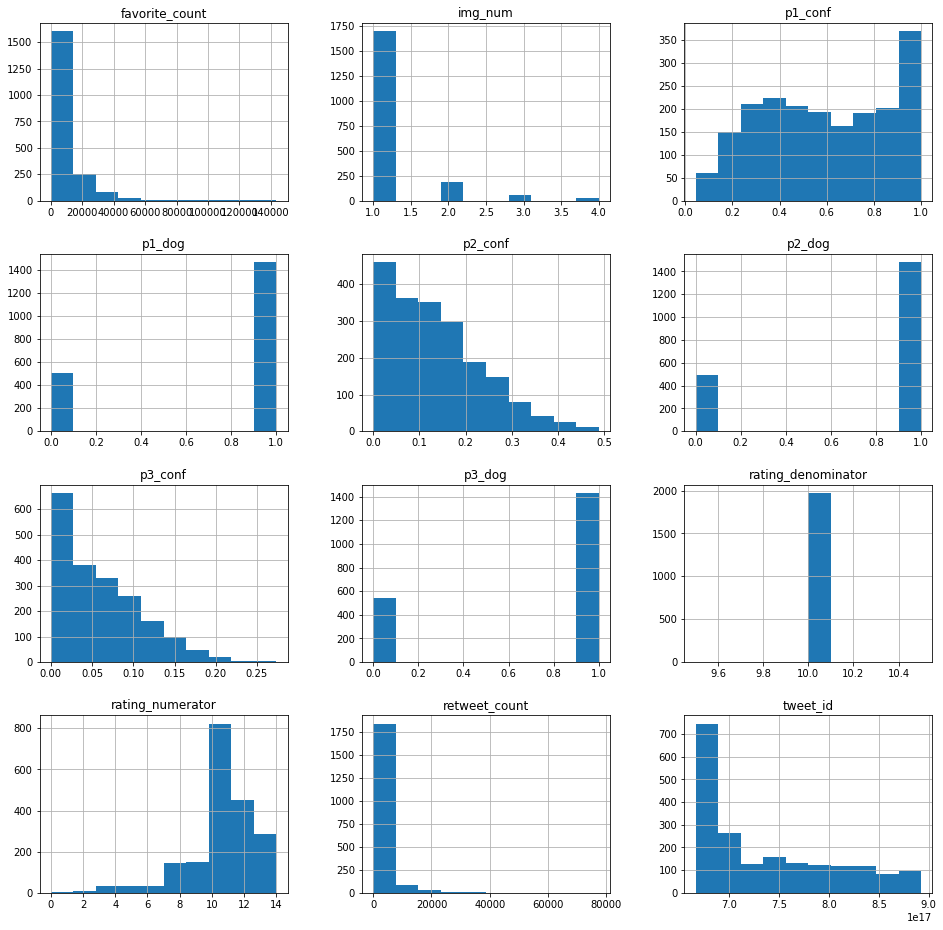

In [91]:
df.hist(figsize=(16, 16));

The histograms of interest are the following:
1. favorite_count: The plot is skewed to the left.
2. rating_numerator: The plot is skewed to the right.
3. retweet_count: The plot is skewed to the left.

### P1: How does retweet count and favorites vary among the four different dog stages?

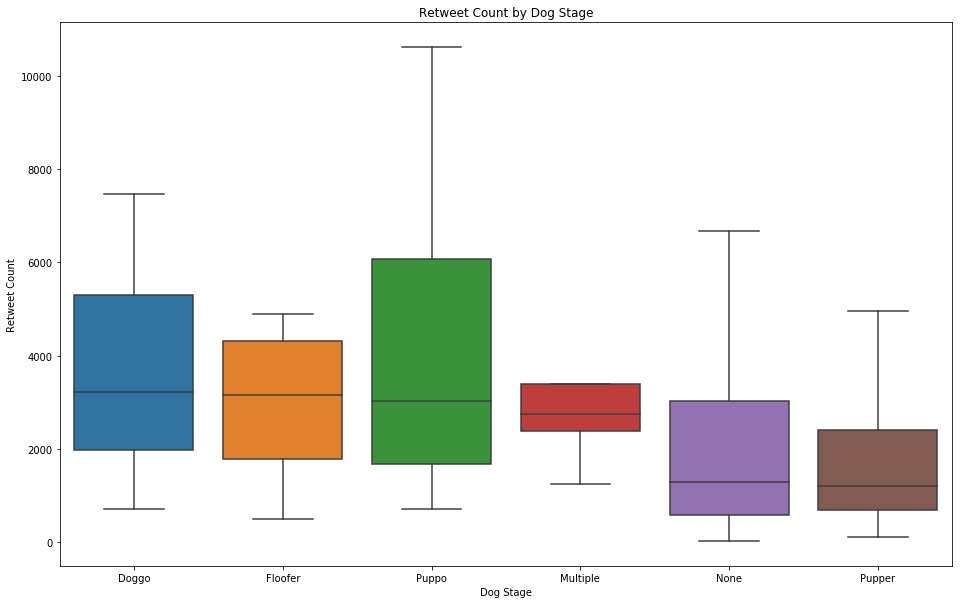

In [92]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(x='dog_stage', y='retweet_count', data=df, showfliers=False, ax=ax,
            order=['Doggo', 'Floofer', 'Puppo', 'Multiple', 'None', 'Pupper'])
plt.title('Retweet Count by Dog Stage')
plt.ylabel('Retweet Count')
plt.xlabel('Dog Stage')
plt.show()

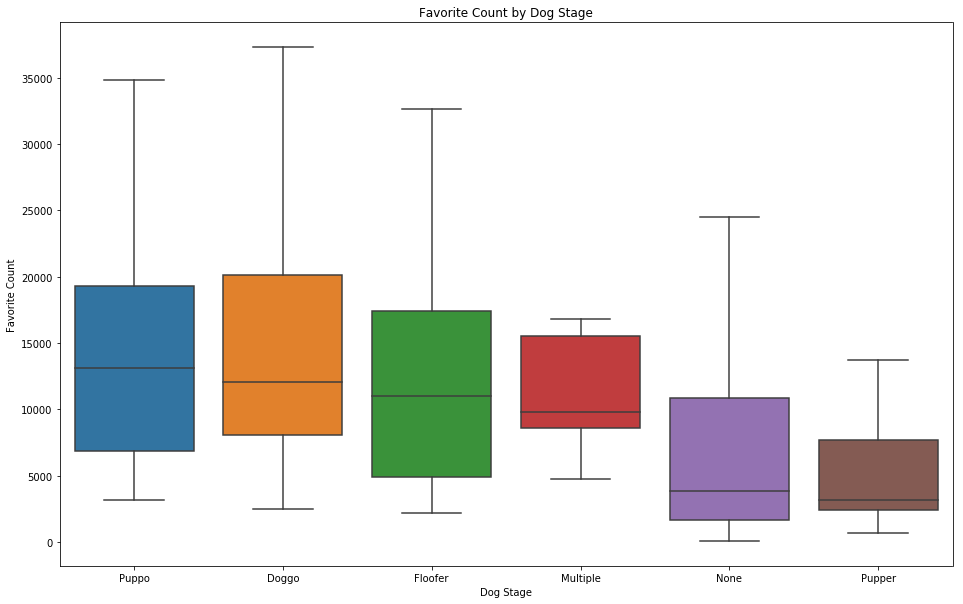

In [93]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(x='dog_stage', y='favorite_count', data=df, showfliers=False, ax=ax,
            order=['Puppo', 'Doggo', 'Floofer', 'Multiple', 'None', 'Pupper'])
plt.title('Favorite Count by Dog Stage')
plt.ylabel('Favorite Count')
plt.xlabel('Dog Stage')
plt.show()

The boxplots show the median retweets and favorites decreasing across the dog stage identified earlier. Outliers are not shown to emphasize the 25% to 75% percentile ranges and the median values.

The median retweets for Doggo, Floofer, Puppo and Multiple are almost similar but their distributions are different. Puppos have very large retweets and very small retweets while Floofers and multiple have smaller distributions. Similarly for median favorites, Puppo, Doggo, Floofer and Multiple have almost similar values but this time, their distributions are more similar except for Multiple. The None dog stage have the same height for retweets and favorites considering their value counts.

### P2: How does the rating affect the retweets and favorites?

In [94]:
import statsmodels.api as sms

C:\Users\Lawrence\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


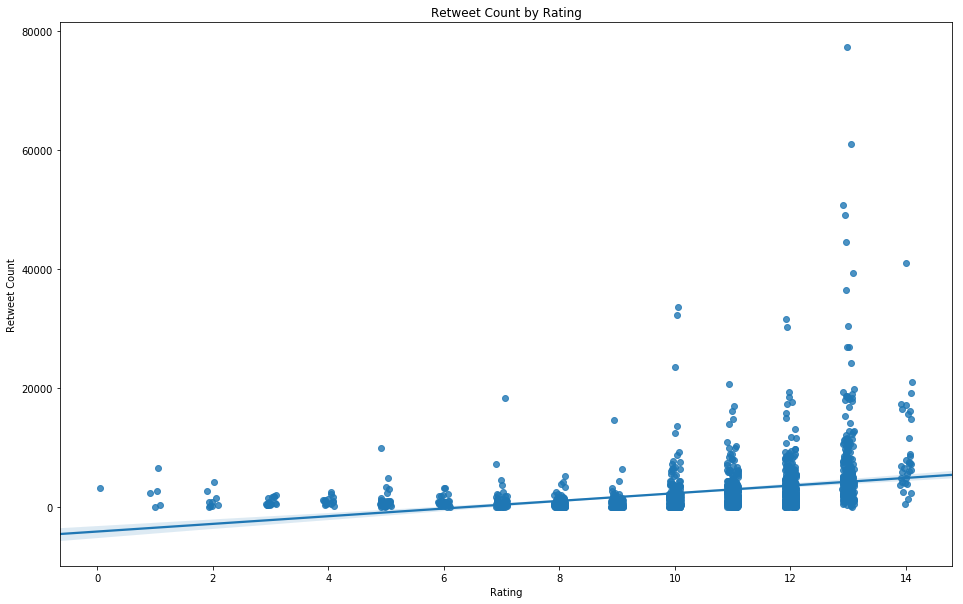

In [95]:
fig, ax = plt.subplots(figsize=(16,10))
sns.regplot(x='rating_numerator', y='retweet_count', data=df, x_jitter=0.1)
plt.title('Retweet Count by Rating')
plt.ylabel('Retweet Count')
plt.xlabel('Rating')
plt.show()

In [96]:
# Fit linear model and obtain results
df['intercept'] = 1

lm = sms.OLS(df['retweet_count'], df[['intercept', 'rating_numerator']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     191.4
Date:                Fri, 01 Jun 2018   Prob (F-statistic):           1.28e-41
Time:                        17:30:04   Log-Likelihood:                -19377.
No. Observations:                1971   AIC:                         3.876e+04
Df Residuals:                    1969   BIC:                         3.877e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept        -4041.3336    500.194     -8.080      0.000   -5022.299   -3060.369
rating_numerator   643.5768     46.514     13.836      0.000     552.355     734.798
==============================================================================
Omnibus:                     2496.297   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434665.302
Skew:                           6.759   Prob(JB):                         0.00
Kurtosis:                      74.484   Cond. No.                         53.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

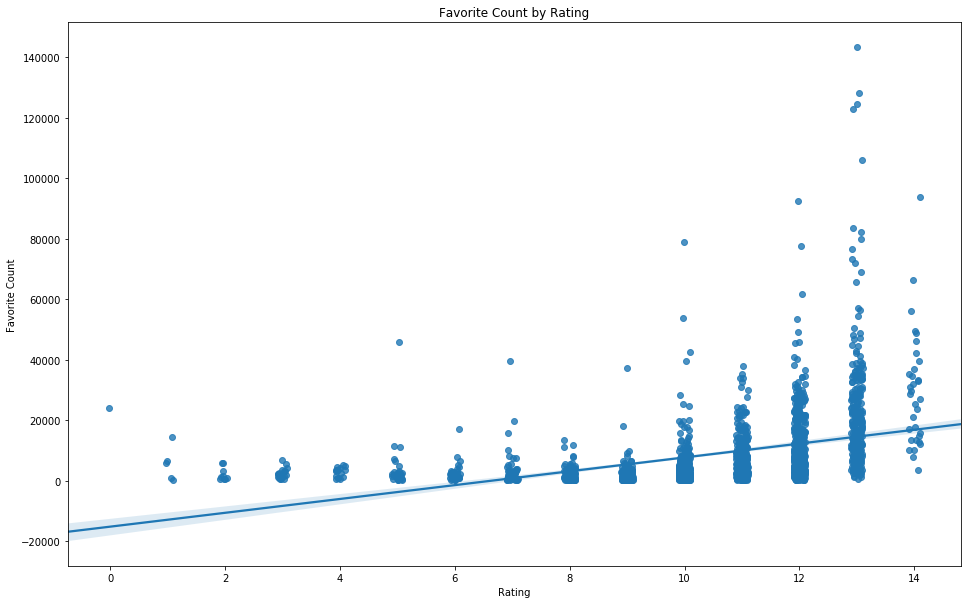

In [97]:
fig, ax = plt.subplots(figsize=(16,10))
sns.regplot(x='rating_numerator', y='favorite_count', data=df, x_jitter=0.1)
plt.title('Favorite Count by Rating')
plt.ylabel('Favorite Count')
plt.xlabel('Rating')
plt.show()

In [98]:
# Fit linear model and obtain results
df['intercept'] = 1

lm = sms.OLS(df['favorite_count'], df[['intercept', 'rating_numerator']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     364.7
Date:                Fri, 01 Jun 2018   Prob (F-statistic):           1.01e-74
Time:                        17:30:04   Log-Likelihood:                -21243.
No. Observations:                1971   AIC:                         4.249e+04
Df Residuals:                    1969   BIC:                         4.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept        -1.519e+04   1288.785    -11.788      0.000   -1.77e+04   -1.27e+04
rating_numerator  2288.6443    119.846     19.097      0.000    2053.606    2523.683
==============================================================================
Omnibus:                     1760.625   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71682.871
Skew:                           4.106   Prob(JB):                         0.00
Kurtosis:                      31.380   Cond. No.                         53.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The scatterplots show the earlier findings on how the rating affect the retweets and favorites. The plots show an increasing count when the rating is also increased. The low P-value suggests we have evidence that the ratings have a statistically significant linear relationship with either the retweets or favorites. However their R^2 values indicate that ratings only account for 8.9% and 15.6% of the variance in retweets and favorites, respectively.